### Simulação de SEGMENTAÇÃO DE CLIENTES

O Presente estudo traz uma metodologia de segmentação de clientes, utilizando um conjunto de dados com tamanho amostral de 2000 ocorrências, com dados fictícios simulando dados anônimos de clientes, de forma a proteger a privacidade dos usuários. Assim buscamos simulanr uma coleta de dados que poderia ser realizada pelo consentimento do cliente ao aderir o uso da poupança, através de termo de consentimento de compartilhamento de dados.  


#### DESCRIÇÃO DAS VARIÁVEIS
**ID**: Apresenta o ID do cliente, Primary Key.

**Sex Biological**: Gênero dos clientes. 
0 - Masculino.
1 - Feminino.

**Marital status**: Estado Civil do Cliente.
0 - Solteiro
1 - Não Solteiro

**Age**: Idade do Cliente, pode ser obtido pela Data atual subtraindo data de nascimento, utilizando biblioteca datetime. (Inteiro)


**Education**: Escolaridade do Cliente
0 - Ensino Médio Incompleto
1 - Ensino Médio Completo
2 - Graduação Incompleta
3 - Graduado

**SavAcBal**: Saldo Pontual da Poupança (Inteiro)


**Occupation**: Ocupação
0 - Desempregado 
1 - Empregado
2 - Autonomo

**Settlement size**: Tamanho da cidade
0 - Cidade Pequena
1 - Cidade Médio Porte
2 - Cidade de Porte Grande

Esta análise explora dados simulados para segmentação de clientes, de forma a contribuir com a teoria de dados que guiem as decisões, utilizando método de clusterização com K-means, disponível na biblioteca sklearn do Python.


A segmentação utilizando aprendizagem de máquina não supervisionada ajuda-nos a enteder de maneira simples diferentes grupos presentes na população apresentada, e assim guiar ações de marketing para públicos específicos, pensando em comunicação direcionada e estratégias que visam o sucesso do cliente.


### IMPORTANDO LIVRARIAS

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv('Savings Account Balance.csv')
data.head()

,Unnamed: 0,ID,Sex,Marital status,Age,Education,SavAcBal,Occupation,Settlement size
0,0,100000001,0,0,67,2,31167,1,2
1,1,100000002,1,1,22,1,37693,1,2
2,2,100000003,0,0,49,1,22302,0,0
3,3,100000004,0,0,45,1,42891,1,1
4,4,100000005,0,0,53,1,37257,1,1


### PRÉ-PROCESSAMENTO

In [3]:
data.describe()

,Unnamed: 0,ID,Sex,Marital status,Age,Education,SavAcBal,Occupation,Settlement size
count,2000.000000,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,999.500000,1.000010e+08,0.457000,0.496500,35.909000,1.03800,32994.034000,0.810500,0.739000
std,577.494589,5.774946e+02,0.498272,0.500113,11.719402,0.59978,16157.326889,0.638587,0.812533
min,0.000000,1.000000e+08,0.000000,0.000000,18.000000,0.00000,8958.000000,0.000000,0.000000
25%,499.750000,1.000005e+08,0.000000,0.000000,27.000000,1.00000,25093.000000,0.000000,0.000000
50%,999.500000,1.000010e+08,0.000000,0.000000,33.000000,1.00000,29570.500000,1.000000,1.000000
75%,1499.250000,1.000015e+08,1.000000,1.000000,42.000000,1.00000,35998.750000,1.000000,1.000000
max,1999.000000,1.000020e+08,1.000000,1.000000,76.000000,3.00000,175800.000000,2.000000,2.000000


In [4]:
data.isnull().any()

Unnamed: 0         False
ID                 False
Sex                False
Marital status     False
Age                False
Education          False
SavAcBal           False
Occupation         False
Settlement size    False
dtype: bool

Para esta simulação de análise exploratória investigaremos os dados em variáveis em pares e buscar relações entre estes pares, para posterior análise no K-Means.

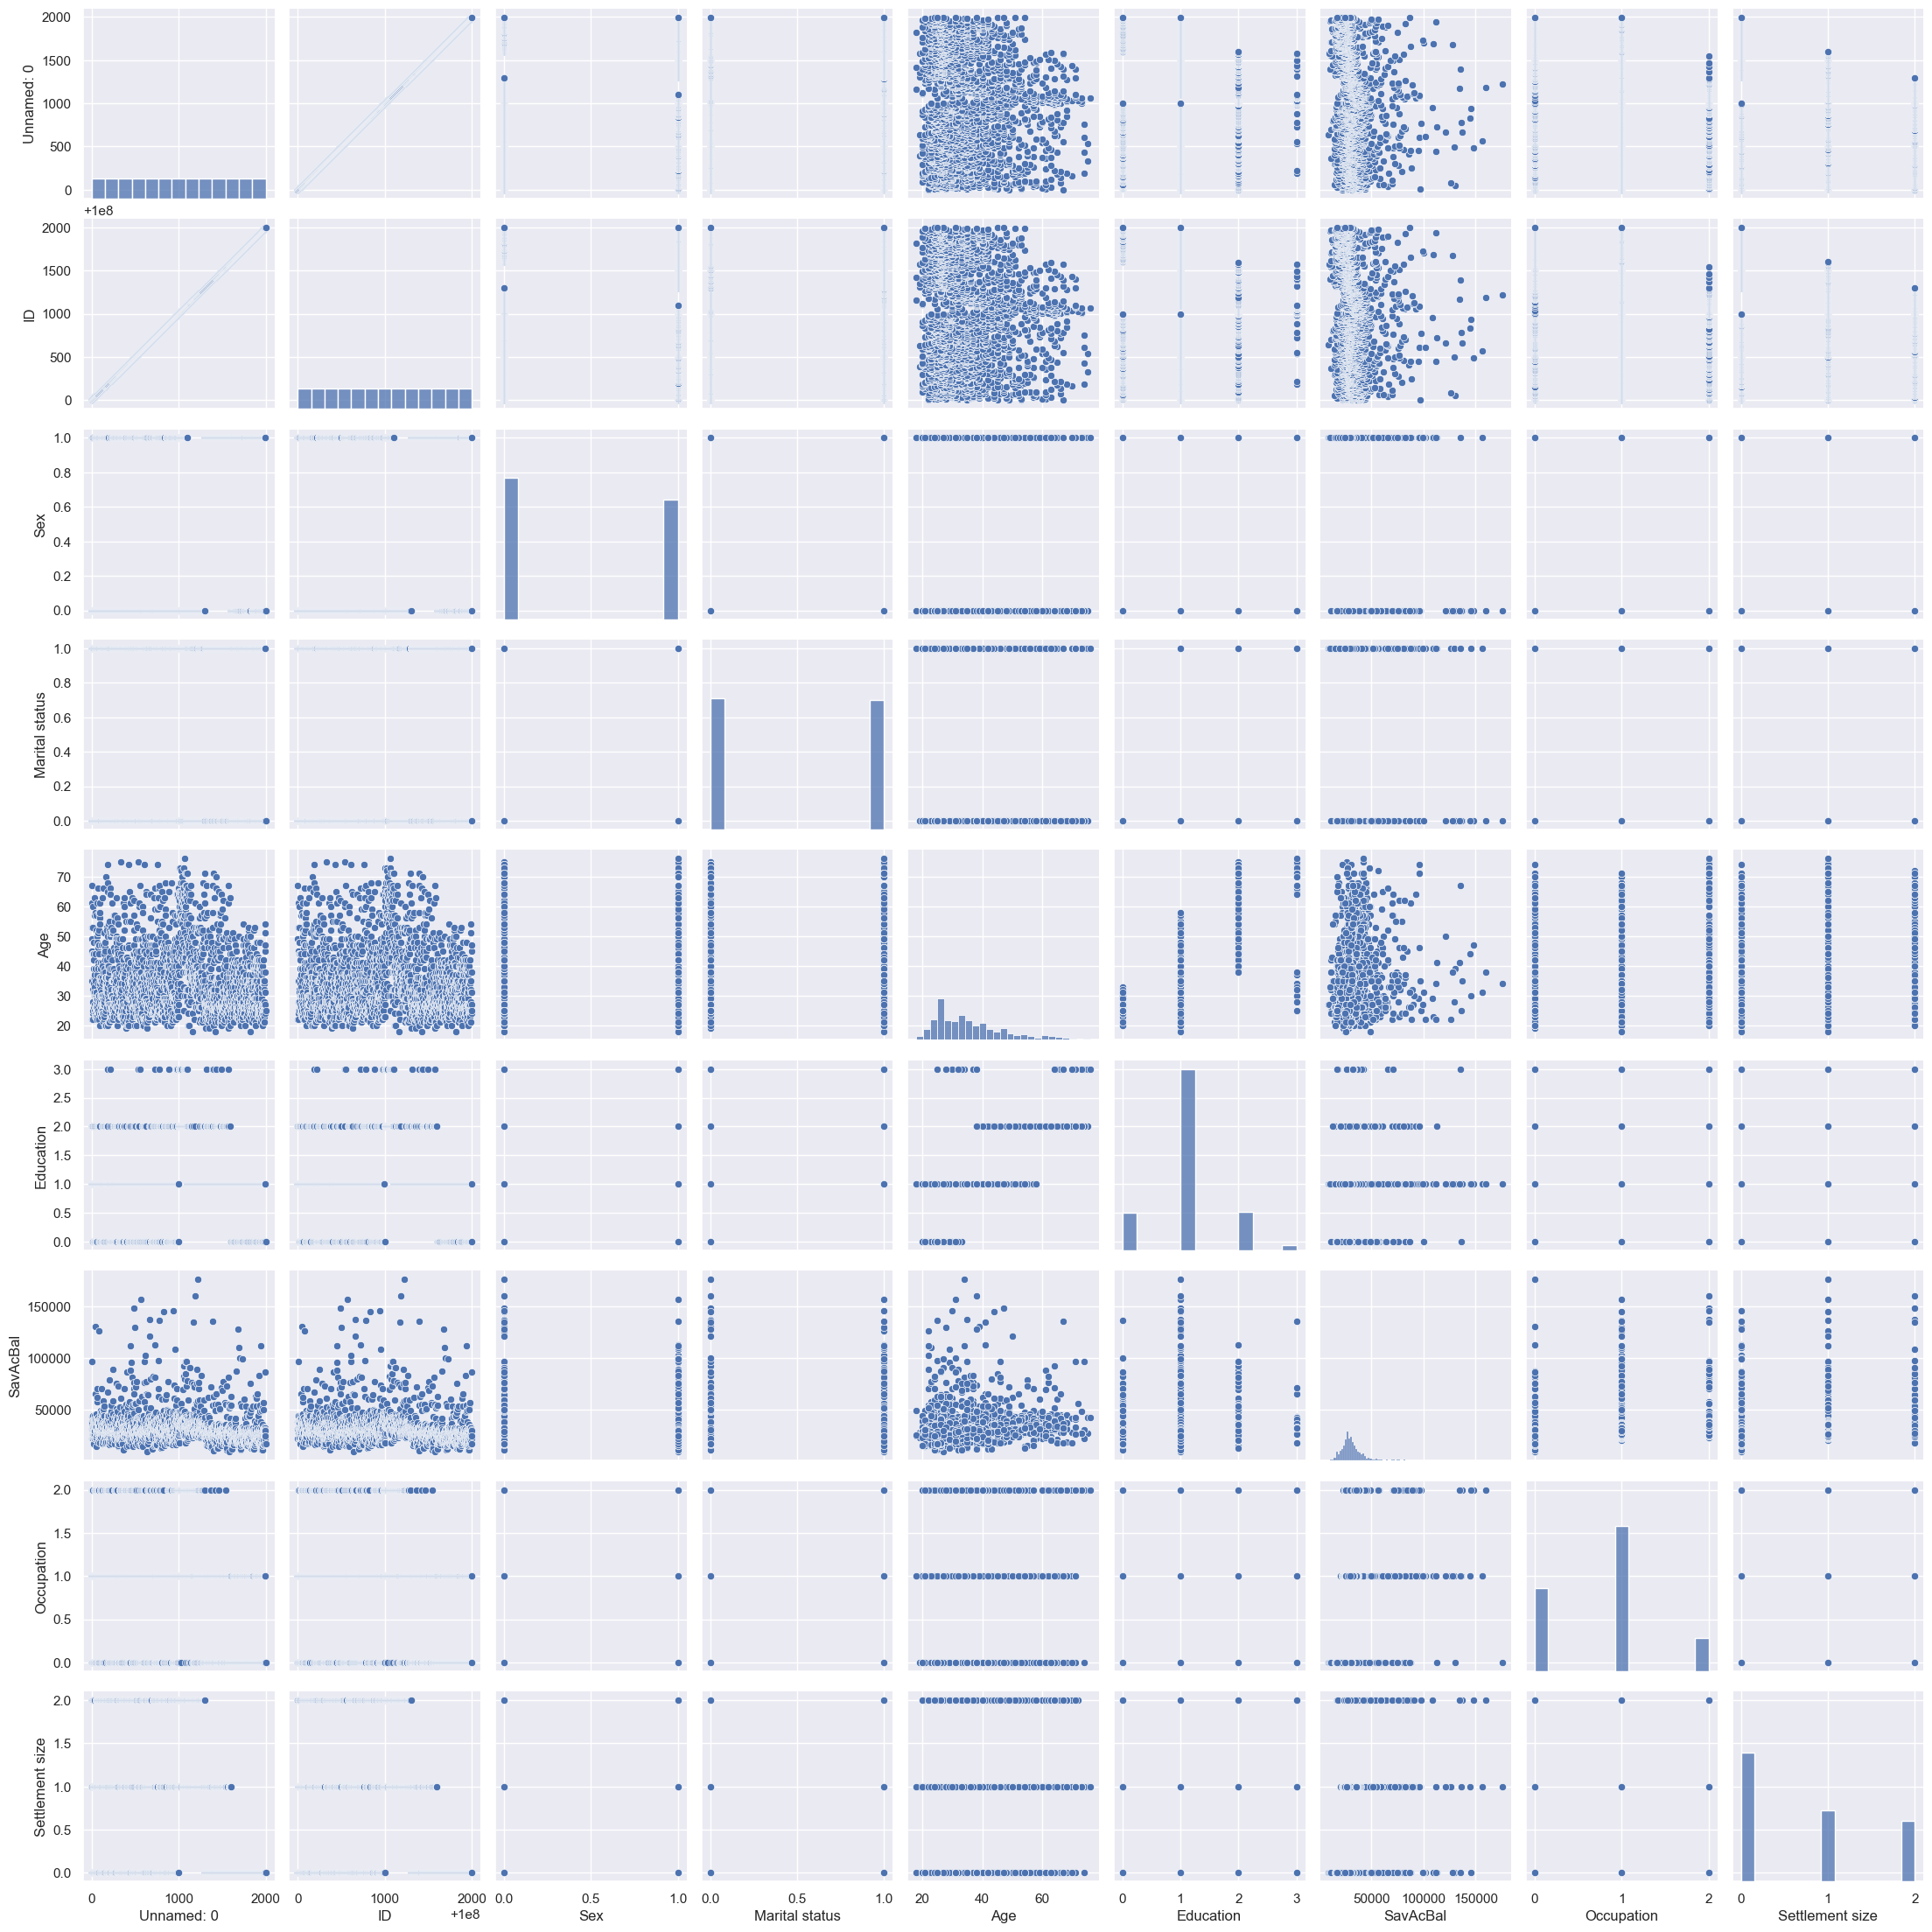

In [5]:
sns.pairplot(data)

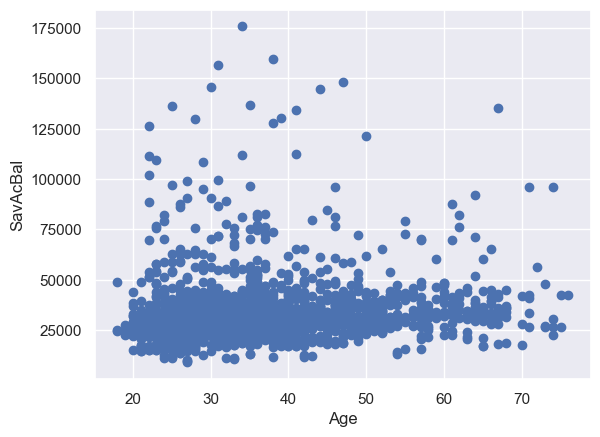

In [6]:
plt.scatter(data['Age'], data['SavAcBal'])
plt.xlabel('Age')
plt.ylabel('SavAcBal')
plt.show()

In [7]:
min(data['SavAcBal'])

8958

In [8]:
new_data = data[['Age', 'SavAcBal']]
new_data.head()

,Age,SavAcBal
0,67,31167
1,22,37693
2,49,22302
3,45,42891
4,53,37257


#### REMOÇÃO DOS OUTLIERS

De forma a evitar outliers e tendencies de clusters com apenas uma amostra, vamos remover o primeiro percentil das variáveis selecionadas.

In [9]:
q = new_data['Age'].quantile(0.99)
q1 = new_data['SavAcBal'].quantile(0.99)
data_1 = new_data[new_data['Age']<q]
data_2 = data_1[data_1['SavAcBal']<q1]
data_2.head()

,Age,SavAcBal
0,67,31167
1,22,37693
2,49,22302
3,45,42891
4,53,37257


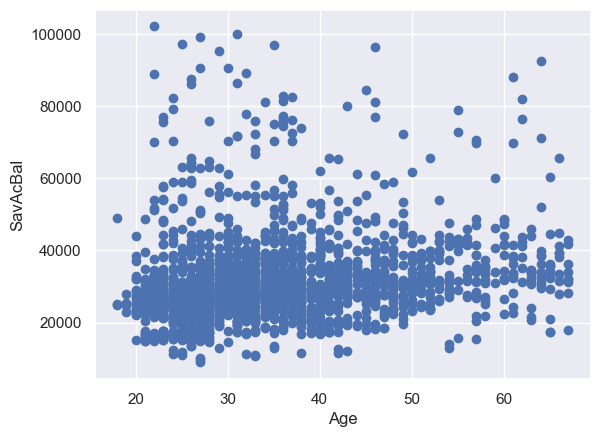

In [10]:
plt.scatter(data_2['Age'],data_2['SavAcBal'])
plt.xlabel('Age')
plt.ylabel('SavAcBal')
plt.show()

#### PADRONIZAÇÃO DOS DADOS (STANDARDIZATION)

A padronização sera feita para evitar que a escala interfica na criação dos Cluters, evitando tendenciosidade.

In [11]:
from sklearn.preprocessing import StandardScaler
std_new_data = pd.DataFrame(StandardScaler().fit_transform(new_data), columns=new_data.columns)

Depois de padronizado, as escalas devem mudar.

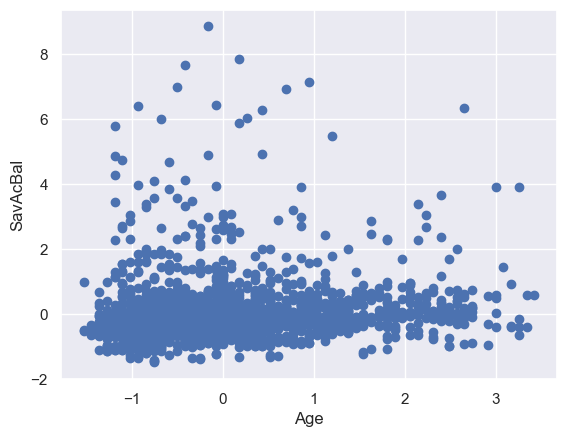

In [12]:
plt.scatter(std_new_data['Age'],std_new_data['SavAcBal'])
plt.xlabel('Age')
plt.ylabel('SavAcBal')
plt.show()

#### MODELAMENTO

Para entender uma quantidade interessante de clusters usaremos o método elbow, que indica uma quantidade ótima de clusters a serem criados com o dataset.

In [13]:
wcss = []
cl_num = 10
for i in range (1,cl_num):
    kmeans= KMeans(i)
    kmeans.fit(std_new_data)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)
wcss

[3999.9999999999995,
 2488.04816148017,
 1461.0447579880715,
 1132.115442243732,
 888.1278904966216,
 741.7192788203181,
 629.179451943707,
 554.7693349962265,
 497.9910674482004]

Text(0, 0.5, 'Somando os Quadrados dentro do Clusters')

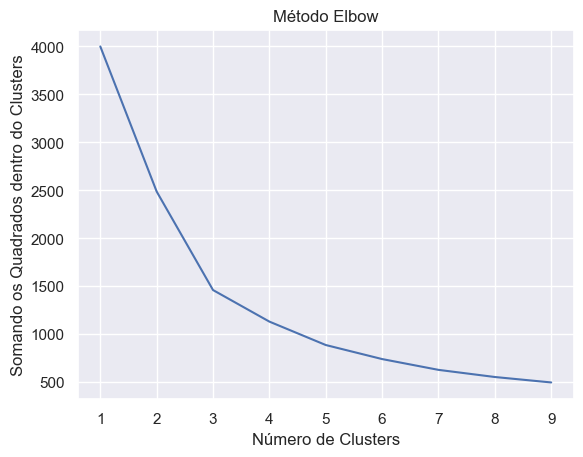

In [14]:
number_clusters = range(1,cl_num)
plt.plot(number_clusters, wcss)
plt.title('Método Elbow')
plt.xlabel('Número de Clusters')
plt.ylabel('Somando os Quadrados dentro do Clusters')

Este método gera inicialmente mede a variabilidade dentro das observações de cada Cluster. Quanto menor variabilidade melhor, pois temos grupos melhor definidos, após o método é confrontrado com o número de clusters, para escolher a quantidade ótima. Quando a curva do gráfico anterior tende a linearidade quer eizer que aumentar o numero de cluesters não irá contribuir com a análise.

Portanto, selecionamos 5 Clusters.

#### APRENDIZADO NÃO SUPERVSIONADO (UNSUPERVISED LEARNING)

Aora iremos usar a aprendizagem não supervisionada, que fará inferência após conhcer os dados, usando apenas o dados de entrada, não sendo treinado e evitando referências.

##### K-MEANS COM 5 CLUSTERS

In [15]:
kmeans_five = KMeans(5,  init='k-means++')
kmeans_five.fit(std_new_data)

KMeans(n_clusters=5)

In [16]:
clusters_five = new_data.copy()
clusters_five['cluster_pred']=kmeans_five.fit_predict(std_new_data)
clusters_five.head()

,Age,SavAcBal,cluster_pred
0,67,31167,1
1,22,37693,0
2,49,22302,3
3,45,42891,3
4,53,37257,1


Text(0.5, 1.0, 'Clusters de Idade x Saldo na Poupança')

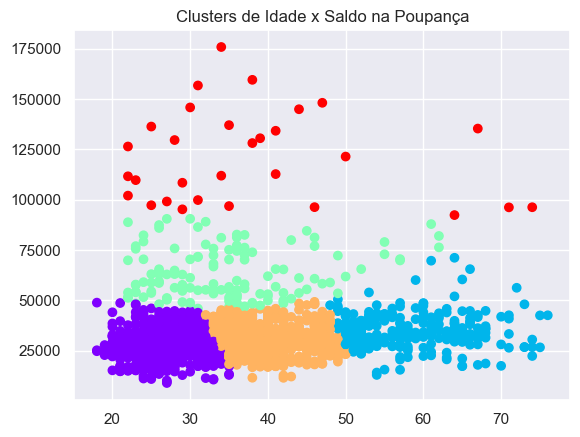

In [17]:
plt.scatter(clusters_five['Age'], clusters_five['SavAcBal'], c= clusters_five['cluster_pred'], cmap = 'rainbow')
plt.title('Clusters de Idade x Saldo na Poupança')

#### Conforme Escolhido, observamos 5 Clusters.

**Grupo Roxo** - Entre 0 e 35 Anos, Saldo Até R$50000.

**Grupo Laranja** - Entre 32 e 50 Anos, Até R$50000.

**Grupo Azul** - Mais de 50 Anos, Até R$75000.

**Grupo Verde Claro** - Até 60 Anos, Entre R$50000 - 90000.

**Grupo Vermelho** - Qualquer Idade, Acima de R$90000.

https://www.kaggle.com/code/gustavogodinho/segmenta-o-de-clientes/notebook